In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import imblearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,accuracy_score,precision_score,
                             confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve)

import warnings
warnings.simplefilter("ignore")

In [2]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
   
    return df

In [3]:
df = wrangle(r'C:\Users\kelvin\OneDrive\Desktop\file1\credit_risk_dataset_training.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


In [4]:
listl = []
j=df[["cb_person_cred_hist_length","loan_int_rate","person_emp_length","person_age","person_income"]]
for k in df.columns:
    if k not in j.columns:
        print(k)
        listl.append(k)


person_home_ownership
loan_intent
loan_grade
loan_amnt
loan_status
loan_percent_income
cb_person_default_on_file


In [5]:
df=df[listl]

In [6]:
df["loan_status"].value_counts(normalize=True)*100

0    77.969365
1    22.030635
Name: loan_status, dtype: float64

In [7]:
df.isna().sum()

person_home_ownership        0
loan_intent                  0
loan_grade                   0
loan_amnt                    0
loan_status                  0
loan_percent_income          0
cb_person_default_on_file    0
dtype: int64

In [8]:
orde =OrdinalEncoder()
trans_one =orde.fit_transform(df)
df=pd.DataFrame(trans_one,columns=df.columns)
df

,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file
0,3.0,4.0,3.0,694.0,1.0,59.0,1.0
1,2.0,1.0,1.0,5.0,0.0,10.0,0.0
2,3.0,3.0,2.0,694.0,1.0,53.0,0.0
3,2.0,5.0,0.0,55.0,1.0,25.0,0.0
4,3.0,1.0,1.0,694.0,1.0,45.0,0.0
...,...,...,...,...,...,...,...
22845,3.0,4.0,3.0,594.0,1.0,31.0,1.0
22846,0.0,4.0,2.0,179.0,0.0,11.0,0.0
22847,0.0,4.0,0.0,545.0,0.0,15.0,0.0
22848,0.0,4.0,1.0,488.0,0.0,10.0,0.0


In [9]:
s_impute=SimpleImputer(verbose=0,strategy="mean",missing_values=np.nan)
df1= s_impute.fit_transform(df)

In [10]:
df=pd.DataFrame(df1,columns=df.columns)
df.isna().sum()

person_home_ownership        0
loan_intent                  0
loan_grade                   0
loan_amnt                    0
loan_status                  0
loan_percent_income          0
cb_person_default_on_file    0
dtype: int64

In [11]:
y = df["loan_status"]
X=df[[i for i in df.columns if "loan_status" not in  i]]

In [12]:
scaler=StandardScaler()
scaler_x=scaler.fit_transform(X)
scaler_x

array([[ 0.92499424,  0.85196879,  1.52901403,  2.23240918,  3.94017427,
         2.15581844],
       [ 0.22681043, -0.88124764, -0.1880927 , -1.5968929 , -0.65931249,
        -0.46386096],
       [ 0.92499424,  0.27422998,  0.67046067,  2.23240918,  3.37697181,
        -0.46386096],
       ...,
       [-1.16955718,  0.85196879, -1.04664606,  1.40430177, -0.1899771 ,
        -0.46386096],
       [-1.16955718,  0.85196879, -0.1880927 ,  1.087509  , -0.65931249,
        -0.46386096],
       [ 0.92499424,  0.27422998, -0.1880927 , -0.49089709, -0.1899771 ,
        -0.46386096]])

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [14]:
X_train,X_test,y_train,y_test=train_test_split(scaler_x,y,test_size=0.3,random_state=42)

In [15]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_preds= model.predict(X_test)
print(classification_report(y_test,y_preds))
print("\n Accuracy Score:",
      accuracy_score(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      5315
         1.0       0.73      0.46      0.56      1540

    accuracy                           0.84      6855
   macro avg       0.79      0.70      0.73      6855
weighted avg       0.83      0.84      0.83      6855


 Accuracy Score: 0.8401167031363967


### SMOTE 

In [17]:
oversample = SMOTE(random_state=12)
X_train_s, y_train_s = oversample.fit_resample(X_train, y_train)

In [18]:
model= LogisticRegression()
model.fit(X_train_s,y_train_s)

LogisticRegression()

In [19]:
y_pre=model.predict(X_test)
y_pre
y_test=y_test.astype(int)


 Score: 0.8529955651122162


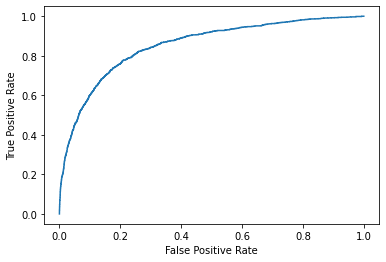

In [20]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)[:,1]
y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr,_= metrics.roc_curve(y_test,  y_pred)
score=roc_auc_score(y_test,y_pred)
print("\n Score:",score)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      4539
         1.0       0.78      0.52      0.62      2316

    accuracy                           0.79      6855
   macro avg       0.78      0.72      0.74      6855
weighted avg       0.79      0.79      0.77      6855



## Resample - Upscaling

In [22]:
from sklearn.utils import resample,shuffle

In [23]:
len(df[df["loan_status"]==0.0])

17816

In [24]:
df_majority= df[df.loan_status==0.0]
df_minority = df[df.loan_status!=0.0]
print(df_minority.shape)
print(df_majority.shape)

(5034, 7)
(17816, 7)


In [25]:
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=17816,
                                 random_state=42
                                )

In [26]:
df_majority.shape,df_minority.shape

((17816, 7), (5034, 7))

In [27]:
df_minority_upsampled["loan_status"].value_counts()

1.0    17816
Name: loan_status, dtype: int64

In [28]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.head()

,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file
1,2.0,1.0,1.0,5.0,0.0,10.0,0.0
10,3.0,1.0,0.0,694.0,0.0,30.0,0.0
11,0.0,0.0,1.0,680.0,0.0,6.0,0.0
12,3.0,1.0,0.0,694.0,0.0,29.0,0.0
15,3.0,5.0,0.0,694.0,0.0,22.0,0.0


In [29]:
X_u=df_upsampled[[i for i in df_upsampled.columns if "loan_status" not in  i]]
y=df_upsampled[[i for i in df_upsampled.columns if "loan_status" in  i]]

In [30]:
scaler=StandardScaler()
scaler_u=scaler.fit_transform(X_u)
scaler_u

array([[ 0.08970344, -0.84677932, -0.39646701, -1.60036208, -0.79704458,
        -0.53490339],
       [ 0.80015309, -0.84677932, -1.17020522,  2.10391905,  0.85024206,
        -0.53490339],
       [-1.33119586, -1.4303178 , -0.39646701,  2.02865064, -1.12650191,
        -0.53490339],
       ...,
       [-1.33119586,  0.32029764, -1.17020522,  1.35661125,  0.35605607,
        -0.53490339],
       [ 0.80015309,  0.32029764, -0.39646701, -0.8261727 ,  0.52078473,
        -0.53490339],
       [ 0.80015309, -1.4303178 ,  1.15100943, -0.37456223,  0.27369174,
        -0.53490339]])

In [31]:
X_train_u,X_test_u,y_train_u,y_test_u=train_test_split(scaler_u,y,test_size=0.3,random_state=42)

In [32]:
model= LogisticRegression()
model.fit(X_train_u,y_train_u)

LogisticRegression()

In [33]:
y_pre=model.predict(X_test)
y_pre
y_test=y_test.astype(int)

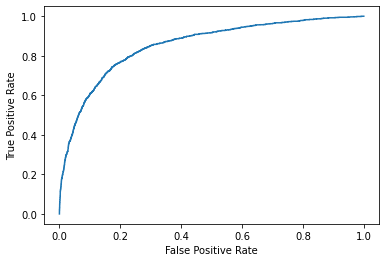

In [34]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)[:,1]
y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr,_= metrics.roc_curve(y_test,  y_pred)
score=roc_auc_score(y_test,y_pred)
# print("accuracy_score:",accuracy_score(y_pred,y_test))

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
predictions = pd.DataFrame(model.predict(X_test),columns=["Predictions"])
predictions["Predictions"].value_counts(normalize=True)*100

0.0    53.975201
1.0    46.024799
Name: Predictions, dtype: float64

In [36]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

         0.0       0.66      0.94      0.78      3700
         1.0       0.87      0.42      0.57      3155

    accuracy                           0.70      6855
   macro avg       0.76      0.68      0.67      6855
weighted avg       0.75      0.70      0.68      6855



## Resample - Downscaling

In [37]:
df_majority= df[df.loan_status==0.0]
df_minority = df[df.loan_status!=0.0]
print(df_minority.shape)
print(df_majority.shape)

(5034, 7)
(17816, 7)


In [38]:
df_majority_downsampled = resample(df_majority,
                                 replace=True,
                                 n_samples=5034,
                                 random_state=42
                                )

In [39]:
df_majority_downsampled["loan_status"].value_counts()

0.0    5034
Name: loan_status, dtype: int64

In [40]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
df_downsampled.shape

(10068, 7)

In [41]:
X_d=df_downsampled[[i for i in df_upsampled.columns if "loan_status" not in  i]]
y=df_downsampled[[i for i in df_upsampled.columns if "loan_status" in  i]]

In [42]:
scaler=StandardScaler()
scaler_d=scaler.fit_transform(X_d)
scaler_d

array([[-1.32421345,  0.88077044, -1.16390574,  0.50331317,  0.00567902,
        -0.53769556],
       [ 0.80654906, -1.44134983, -0.39047805, -1.40125043, -1.2230388 ,
        -0.53769556],
       [-1.32421345, -0.86081976,  0.38294965,  0.65889724,  0.00567902,
        -0.53769556],
       ...,
       [-1.32421345, -0.86081976, -0.39047805, -0.04927852, -1.05920976,
        -0.53769556],
       [ 0.80654906, -0.86081976,  1.92980504, -0.43555621, -0.81346619,
         1.85978846],
       [ 0.80654906,  0.88077044,  1.15637735,  1.54411694,  0.90673875,
         1.85978846]])

In [43]:
X_train_d,X_test_d,y_train_d,y_test_d=train_test_split(scaler_d,y,test_size=0.3,random_state=42)

In [44]:
model= LogisticRegression()
model.fit(X_train_d,y_train_d)

LogisticRegression()

In [45]:
y_pre=model.predict(X_test)
y_pre
y_test=y_test.astype(int)

0.8537877362524589


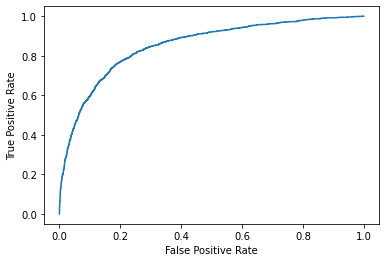

In [46]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)[:,1]
y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr,_= metrics.roc_curve(y_test,  y_pred)
score=roc_auc_score(y_test,y_pred)
print(score)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
predictions = pd.DataFrame(model.predict(X_test),columns=["Predictions"])
predictions["Predictions"].value_counts(normalize=True)*100

0.0    52.997812
1.0    47.002188
Name: Predictions, dtype: float64

In [48]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

         0.0       0.65      0.95      0.77      3633
         1.0       0.87      0.42      0.57      3222

    accuracy                           0.70      6855
   macro avg       0.76      0.68      0.67      6855
weighted avg       0.75      0.70      0.67      6855



## SMOTEEN

In [49]:
from imblearn.combine import SMOTEENN

In [50]:
scaler=StandardScaler()
scaler_se=scaler.fit_transform(X_train)
scaler_se

array([[ 0.9249415 , -0.8805219 ,  0.67113582, -0.17206048,  0.55906767,
         2.14945776],
       [ 0.9249415 ,  0.85203411, -0.18868135, -1.21379318, -1.13097309,
        -0.46523361],
       [ 0.9249415 , -0.30300323,  3.25058733, -0.69014145, -1.22486424,
         2.14945776],
       ...,
       [-1.16821629,  0.85203411, -1.04849853, -0.37260795, -0.37984387,
        -0.46523361],
       [ 0.22722223,  1.42955278,  0.67113582, -0.83498129,  0.18350305,
        -0.46523361],
       [ 0.9249415 , -0.8805219 , -1.04849853, -0.37260795, -0.84929963,
        -0.46523361]])

In [51]:
sm=SMOTEENN(random_state=42)
X_trainse,y_trainse=sm.fit_resample(scaler_se,y_train.ravel())

In [52]:
X_trainse.shape,y_trainse.shape

((18843, 6), (18843,))

In [53]:
model= LogisticRegression()
model.fit(X_trainse,y_trainse)

LogisticRegression()

In [54]:
y_pre=model.predict(X_test)
y_pre
y_test=y_test.astype(int)

0.8531203039669644


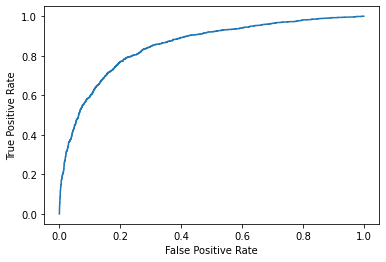

In [55]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)[:,1]
y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr,_= metrics.roc_curve(y_test,  y_pred)
score=roc_auc_score(y_test,y_pred)
print(score)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
predictions = pd.DataFrame(model.predict(X_test),columns=["Predictions"])
predictions["Predictions"].value_counts(normalize=True)*100

0.0    66.491612
1.0    33.508388
Name: Predictions, dtype: float64

In [57]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      4558
         1.0       0.77      0.52      0.62      2297

    accuracy                           0.79      6855
   macro avg       0.78      0.72      0.74      6855
weighted avg       0.79      0.79      0.78      6855



## ADASYN

In [58]:
from imblearn.over_sampling import ADASYN 
sm = ADASYN(random_state=42)

In [59]:
scaler=StandardScaler()
scaler_se=scaler.fit_transform(X_train)
scaler_se

array([[ 0.9249415 , -0.8805219 ,  0.67113582, -0.17206048,  0.55906767,
         2.14945776],
       [ 0.9249415 ,  0.85203411, -0.18868135, -1.21379318, -1.13097309,
        -0.46523361],
       [ 0.9249415 , -0.30300323,  3.25058733, -0.69014145, -1.22486424,
         2.14945776],
       ...,
       [-1.16821629,  0.85203411, -1.04849853, -0.37260795, -0.37984387,
        -0.46523361],
       [ 0.22722223,  1.42955278,  0.67113582, -0.83498129,  0.18350305,
        -0.46523361],
       [ 0.9249415 , -0.8805219 , -1.04849853, -0.37260795, -0.84929963,
        -0.46523361]])

In [60]:
X_train_ada,y_train_ada = sm.fit_resample(scaler_se,y_train.ravel())

In [61]:
model= LogisticRegression()
model.fit(X_train_ada,y_train_ada)

LogisticRegression()

In [62]:
y_pre=model.predict(X_test)
y_pre
y_test=y_test.astype(int)

0.847145300607201


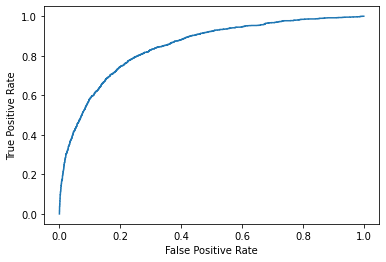

In [63]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)[:,1]
y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr,_= metrics.roc_curve(y_test,  y_pred)
score=roc_auc_score(y_test,y_pred)
print(score)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82      4153
         1.0       0.81      0.46      0.59      2702

    accuracy                           0.75      6855
   macro avg       0.77      0.70      0.70      6855
weighted avg       0.76      0.75      0.73      6855

